In [1]:
import pandas as pd

In [2]:
import math
import pickle
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import SelectFromModel

In [4]:
data = pd.read_csv('files\\train.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
data.shape

(8523, 12)

In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
df = data.copy()

#### EDA & Missing value treatment

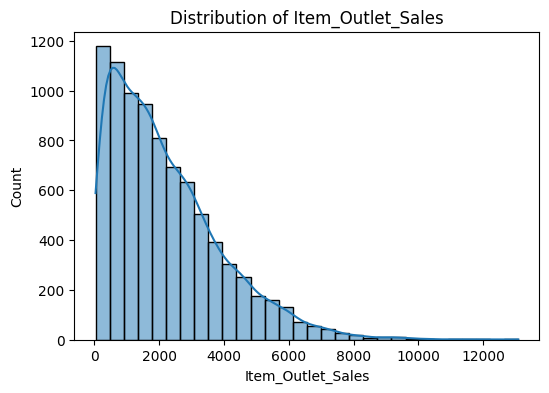

In [12]:
col = 'Item_Outlet_Sales'
plt.figure(figsize=(6, 4))
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')
plt.show()

In [13]:
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

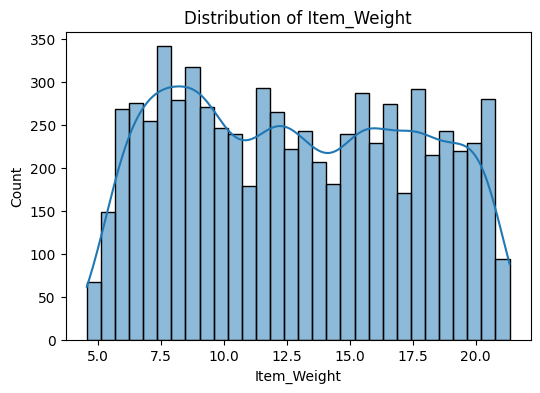

In [14]:
col = 'Item_Weight'
plt.figure(figsize=(6, 4))
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')
plt.show()

In [15]:
df['Item_Weight'].median()

12.6

In [16]:
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)

C:\Users\Sarath\AppData\Local\Temp\ipykernel_13580\170866844.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
#df.to_csv('files//train_df_check.csv', index=False)

In [19]:
#df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)

In [20]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [21]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)

C:\Users\Sarath\AppData\Local\Temp\ipykernel_13580\3665857807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
C:\Users\Sarath\AppData\Local\Temp\ipykernel_13580\3665857807.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

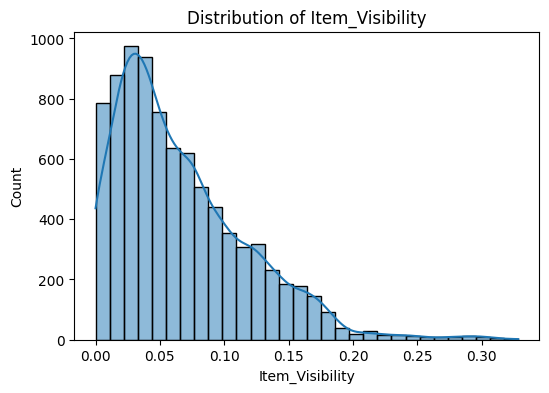

In [22]:
col = 'Item_Visibility'
plt.figure(figsize=(6, 4))
sns.histplot(df[col], kde=True, bins=30)
plt.title(f'Distribution of {col}')
plt.show()

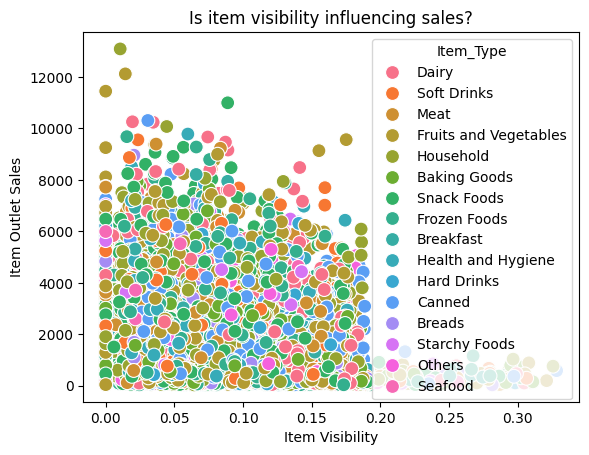

In [23]:
# Scatterplot
sns.scatterplot(data=df, x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_Type', s=100)

plt.title("Is item visibility influencing sales?")
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.show()

In [24]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

<Axes: xlabel='Outlet_Size', ylabel='count'>

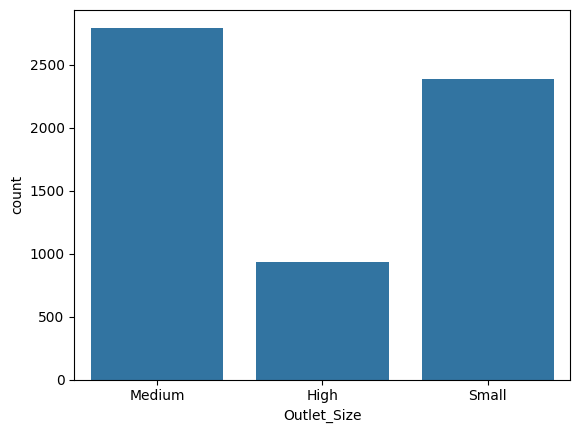

In [25]:
sns.countplot(x='Outlet_Size', data=df)

In [26]:
# Select columns you want to check
cols_to_check = ['Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']
1
# Get distinct combinations
distinct_combinations = df[cols_to_check].drop_duplicates()

print(distinct_combinations)

   Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type
0             OUT049      Medium               Tier 1  Supermarket Type1
1             OUT018      Medium               Tier 3  Supermarket Type2
3             OUT010         NaN               Tier 3      Grocery Store
4             OUT013        High               Tier 3  Supermarket Type1
7             OUT027      Medium               Tier 3  Supermarket Type3
8             OUT045         NaN               Tier 2  Supermarket Type1
9             OUT017         NaN               Tier 2  Supermarket Type1
11            OUT046       Small               Tier 1  Supermarket Type1
19            OUT035       Small               Tier 2  Supermarket Type1
23            OUT019       Small               Tier 1      Grocery Store


In [27]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

C:\Users\Sarath\AppData\Local\Temp\ipykernel_13580\3318935412.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)


In [28]:
len(df['Item_Identifier'].unique())

1559

In [29]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [30]:

reference_year = 2013  # This dataset is from 2013

# Calculate outlet age
df['Outlet_Age'] = reference_year - df['Outlet_Establishment_Year']
#df.drop('Outlet_Establishment_Year', axis=1, inplace=True)

# Categorize outlets
def categorize_age(age):
    if age <= 5:
        return 'New'
    elif age <= 15:
        return 'Mid'
    else:
        return 'Old'

#df['Outlet_Age_Category'] = df['Outlet_Age'].apply(categorize_age)

#### Label Encoding for Categorical variables

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Age                 8523 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [32]:
categorical_cols = df.select_dtypes(include=['object','category']).columns
categorical_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [33]:
le = LabelEncoder()
df[categorical_cols]= df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,14
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,4
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,14
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,15
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,26


In [35]:
corr_matrix = df.corr()
corr_matrix

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
Item_Identifier,1.000000,0.048290,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869,0.012772
Item_Weight,0.048290,1.000000,-0.026807,-0.009187,0.035697,0.025986,-0.007592,-0.013383,-0.004308,0.002926,0.000507,0.013162,0.013383
Item_Fat_Content,-0.114660,-0.026807,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719,-0.003151
Item_Visibility,-0.025482,-0.009187,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625,0.074834
Item_Type,-0.017973,0.035697,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048,-0.004970
Item_MRP,0.012853,0.025986,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574,-0.005020
Outlet_Identifier,-0.008602,-0.007592,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325,-0.079035
Outlet_Establishment_Year,-0.012772,-0.013383,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135,-1.000000
Outlet_Size,0.001389,-0.004308,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182,-0.193389
Outlet_Location_Type,0.003656,0.002926,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367,0.089216


<Axes: >

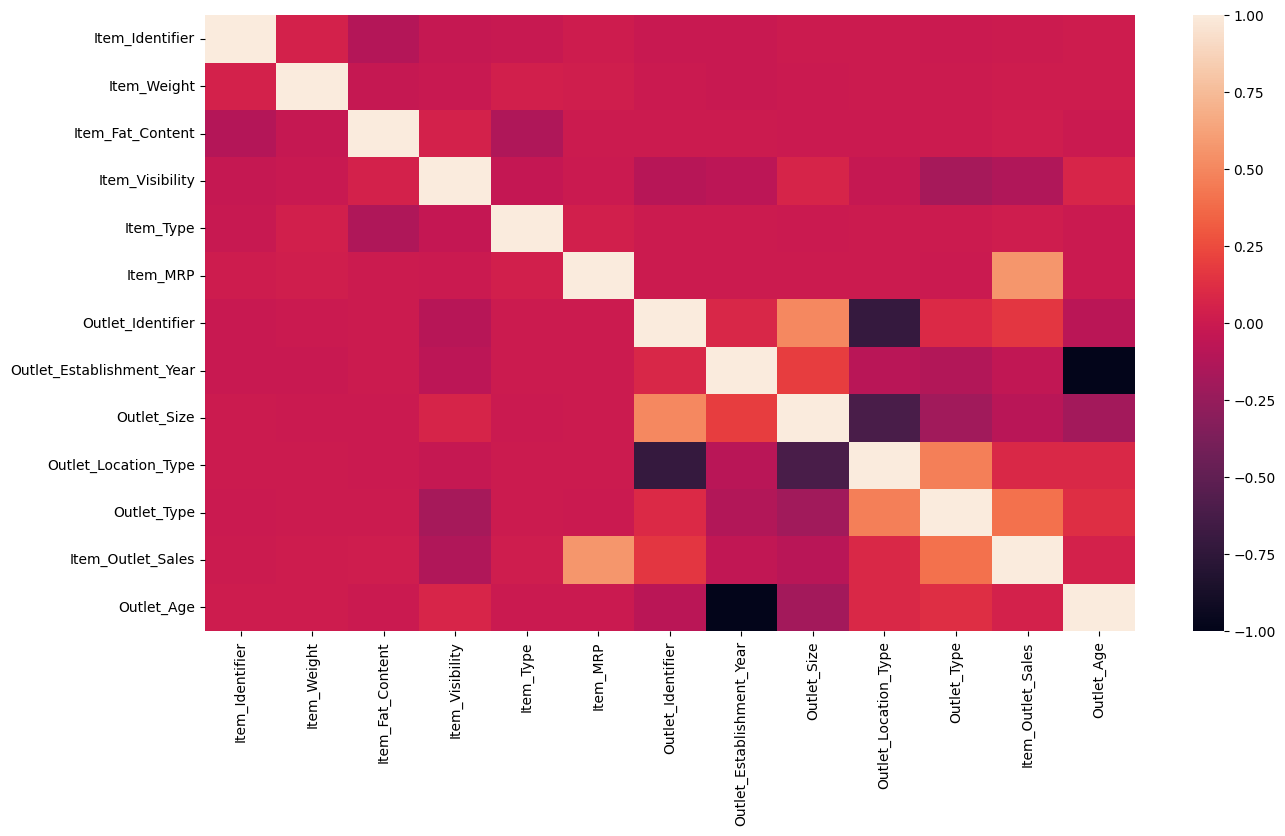

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix)

In [37]:
X = df.drop('Item_Outlet_Sales',axis=1)
y = df['Item_Outlet_Sales']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state =42)

In [39]:
tree = RandomForestRegressor(oob_score=True)
tree.fit(X_train,y_train)

RandomForestRegressor(oob_score=True)

In [40]:
y_pred = tree.predict(X_test)

In [41]:
def metrics(df, y_pred, y_test,X_test):
    n=len(df)
    mse = mean_squared_error(y_test,y_pred)
    rmse = math.sqrt(mean_squared_error(y_test,y_pred))
    score = tree.score(X_test,y_test) 
    rse = math.sqrt(n*mse/(n-2))
    print("R2 Value is:",score)
    print("RMSE score:",rmse)
    print("RSE - Residual Standard Error:",rse)
    

In [42]:
metrics(df, y_pred, y_test,X_test)

R2 Value is: 0.5600187766374667
RMSE score: 1110.4714821394994
RSE - Residual Standard Error: 1110.6017962257474


In [43]:
print(tree.oob_score_)

0.5377431084032186


In [44]:
feature_labels = X.columns
# Print the name and gini importance of each feature
for feature in zip(feature_labels, tree.feature_importances_):
    print(feature)

('Item_Identifier', 0.06203097959438892)
('Item_Weight', 0.0643907163454429)
('Item_Fat_Content', 0.007827696431675975)
('Item_Visibility', 0.08317577370123737)
('Item_Type', 0.03266108863550481)
('Item_MRP', 0.43012301413410453)
('Outlet_Identifier', 0.016611234664796148)
('Outlet_Establishment_Year', 0.02575096044761923)
('Outlet_Size', 0.007413871622591865)
('Outlet_Location_Type', 0.005534931013873968)
('Outlet_Type', 0.22708064992223903)
('Outlet_Age', 0.037399083486525354)


In [45]:
def serialize_model(model, identifier):
    filename = f'model_{identifier}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("✅ Model saved as model.pkl")

In [46]:
identifier = 'tree'
serialize_model(tree, identifier)

✅ Model saved as model.pkl


In [47]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(tree, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(oob_score=True), threshold=0.15)

In [48]:
selected_features = []
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    selected_features.append(feature_labels[feature_list_index])
print(selected_features)

['Item_MRP', 'Outlet_Type']


In [49]:
identifier = 'xgb'
serialize_model(tree, identifier)

✅ Model saved as model.pkl


In [50]:
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# ===== 4. Predictions =====
y_pred = model.predict(X_test)


In [51]:
metrics(df, y_pred, y_test, X_test)

R2 Value is: 0.5600187766374667
RMSE score: 1080.3545128749913
RSE - Residual Standard Error: 1080.4812927279038


In [52]:
identifier = 'xgb'
serialize_model(model, identifier)

✅ Model saved as model.pkl


Feature Importance (by weight): {'Item_Identifier': 474.0, 'Item_Weight': 431.0, 'Item_Fat_Content': 41.0, 'Item_Visibility': 433.0, 'Item_Type': 156.0, 'Item_MRP': 608.0, 'Outlet_Identifier': 189.0, 'Outlet_Establishment_Year': 153.0, 'Outlet_Size': 47.0, 'Outlet_Location_Type': 31.0, 'Outlet_Type': 131.0, 'Outlet_Age': 47.0}


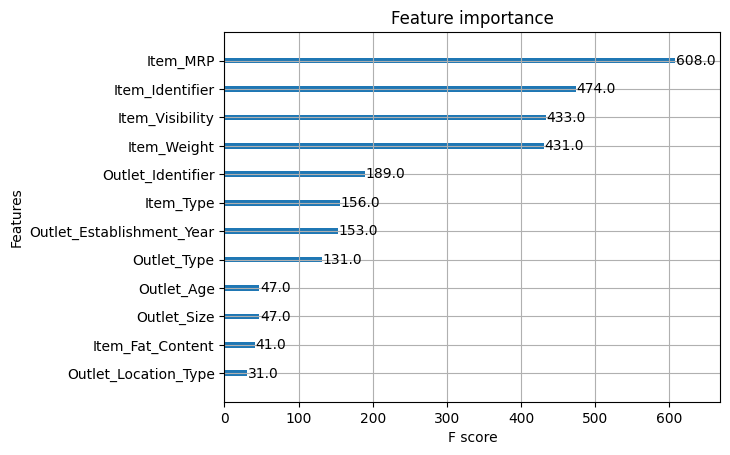

In [53]:
#  Get importance values 
importance_dict = model.get_booster().get_score(importance_type='weight')
print("Feature Importance (by weight):", importance_dict)

# Plot using built-in function 

xgb.plot_importance(model, importance_type='weight')
plt.show()